# This File contains the implementation of basic Machine Learning concepts as cost functions, learning algorithms, etc.

Importing some basic libraries

In [4]:
import numpy as np
import math, copy
import matplotlib.pyplot as plt

# 1 - Cost Functions

Cost is computed to indicate how well our moderl performs on pridicting the correct outputs

In [5]:
def compute_cost(x, y, w, b):
    """
    This function computes total cost for a given dataset with known correct labels

    Args:
        x (array of size (m,)): Dataset of m examples
        y (array of size (m,)): correct labels for our dataset
        w, b (scaler): model parameters
        
    Returns:
        cost (scaler): total cost for the model for the given dataset
    """
    m = len(x)
    
    cost = 0
    
    for i in range(m):
        f = w * x[i] + b
        loss = f - y[i]
        cost += loss**2
    cost = cost / (2 * m)
    
    return cost

def predict_element(x,w,b):
    """
    Predicts the value of a new training example

    Args:
        x (scaler): example to predict its value
        w, b (scaler): model parameters
    
    Return:
        y (scaler): predicted value
    """
    return (x*w+b)



Example

In [6]:
x_train = [1.0, 1.7, 2.0, 2.5, 3.0, 3.2]
y_train = [250, 300, 480,  430,   630, 730]

"model parameters to be tuned"
w = 50
b = 100

cost = compute_cost(x_train,y_train,w,b)
print(f'Total cost = {cost} for the given dataset with model parameters : w = {w} , b = {b}')

Total cost = 42412.5 for the given dataset with model parameters : w = 50 , b = 100


# 2 - Gradient Descent Algorithm

Gradient Descent is used to find the optimum value for model parameters w & b to minimize cost

In [7]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression 

    Args:
        x (array(m,)): Dataset, m examples
        y (array(m,)): target correct labels
        w, b (scaler): model parameters
        
    Returns:
        dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
        dj_db (scalar): The gradient of the cost w.r.t. the parameter b 
        
    """
    
    m = len(x)
    cost_w = 0
    cost_b = 0
    
    for i in range(m):
        f = w * x[i] + b
        loss = f - y[i]
        cost_w += loss * x[i]
        cost_b += loss
    
    dj_dw = cost_w / m
    dj_db = cost_b / m
    
    return dj_dw, dj_db


def gradient_descent(x, y, w_in, b_in, alpha, num_iters, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w, b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
        x (array (m,))  : Data, m examples 
        y (array (m,))  : target values
        w_in, b_in (scalar): initial values of model parameters  
        alpha (float):     Learning rate
        num_iters (int):   number of iterations to run gradient descent
        cost_function:     function to call to produce cost
        gradient_function: function to call to produce gradient
      
    Returns:
        w (scalar): Updated value of parameter after running gradient descent
        b (scalar): Updated value of parameter after running gradient descent
      """
    
    m = len(x)
    w = w_in
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if i % math.ceil(num_iters/10) == 0:
            print(f'Iteration {i}: cost = {compute_cost(x,y,w,b)}, w = {w}, b = {b}')
    
    return w, b
    

Example

In [8]:
# Initialize w and b
w_init = 0
b_init = 0

iterations = 10000

alpha = 0.01

w, b = gradient_descent(x_train, y_train, w_init, b_init, alpha, iterations, compute_gradient)
print(f'Final w = {w} and final b = {b}')


Iteration 0: cost = 109412.86405939351, w = 11.701666666666668, b = 4.7
Iteration 1000: cost = 1780.1184072331873, w = 197.44663545713004, b = 31.632492245930393
Iteration 2000: cost = 1743.3524780932023, w = 204.4663126053129, b = 14.425576598661701
Iteration 3000: cost = 1737.1444183892424, w = 207.35082432551891, b = 7.354945171404292
Iteration 4000: cost = 1736.0961651235302, w = 208.5361221231761, b = 4.449495420562088
Iteration 5000: cost = 1735.9191637798788, w = 209.02318232795508, b = 3.255593809154985
Iteration 6000: cost = 1735.8892764647787, w = 209.22332413497463, b = 2.7649981424056778
Iteration 7000: cost = 1735.8842298838592, w = 209.30556600676786, b = 2.5634035504113033
Iteration 8000: cost = 1735.883377750475, w = 209.33936067254402, b = 2.4805647031164213
Iteration 9000: cost = 1735.883233864678, w = 209.3532475091398, b = 2.4465247293588033
Final w = 209.3589503186303 and final b = 2.4325457728079756


# 4 - Linear Regression with multiple features

In [9]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (3, 4), X Type:<class 'numpy.ndarray'>)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y Shape: (3,), y Type:<class 'numpy.ndarray'>)
[460 232 178]


Predict output value

In [10]:
def predict_element_multiple_features(x, w, b):
    """
    single predict using linear regression

    Args:
        x (array): features of signle example
        w (array): model parameters
        b (scaler): model parameter

    Returns:
        y_hat (scaler): prediction
    """
    y_hat = np.dot(x,w)+b
    
    return y_hat

Example

In [11]:
# get an example
b_init = 100
w_init = [0,0,0,0]
x_example = X_train[0,:]
print(x_example)

#predict its value and compare it to correct one
y_hat = predict_element_multiple_features(x_example,w_init,b_init)
print(f'predicted value = {y_hat} and correct value = {y_train[0]}')

[2104    5    1   45]
predicted value = 100 and correct value = 460


Compute Cost

In [124]:
def compute_cost_multiple_features(X, y, w, b): 
    """
    Computes Cost for dataset with multiple features

    Args:
        X (array (m,n)): Data, m examples with n features
        y (array): target values
        w (array): model parameters with size n
        b (scalar): model parameter

    Returns:
        total_cost (scaler): total cost for the example
    """
    
    m = X.shape[0]
    cost = 0
    
    for i in range(m):
        f = np.dot(X[i],w) + b
        loss = f - y[i]
        cost += loss**2
        
    total_cost = cost/(2 * m)
    
    return total_cost

In [13]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost_multiple_features(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 1.5578904428966628e-12


Compute gradient with multiple features

In [14]:
def compute_gradient_multiple_features(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    cost_b = 0
    cost_w = np.zeros(n)
    
    for i in range(m):
        f = np.dot(X[i],w) + b
        loss = f - y[i]
        cost_b += loss
        
        for j in range(n):
            cost_w[j] += loss*X[i][j]
    
    dj_db = cost_b / m
    dj_dw = cost_w / m
    
    return dj_db,dj_dw

In [15]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient_multiple_features(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -1.6739251501955248e-06
dj_dw at initial w,b: 
 [-2.72623577e-03 -6.27197263e-06 -2.21745578e-06 -6.92403391e-05]


Gradient Descent With Multiple Variables

In [16]:
def gradient_descent_multiple_features(X, y, w_in, b_in, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    m, n = X.shape
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
      dj_db, dj_dw = gradient_function(X,y,w,b)
      
      b = b - alpha * dj_db
      w = w - alpha * dj_dw
    
        
    return w, b

Example

In [17]:
initial_w = np.zeros_like(w_init)
initial_b = 0

iterations = 1000
alpha =  5.0e-7

w_final, b_final = gradient_descent_multiple_features(X_train, y_train, initial_w, initial_b, compute_gradient_multiple_features, alpha, iterations)
print(f"b,w found by gradient descent: {b_final},{w_final} ")

b,w found by gradient descent: -0.002235407530932535,[ 0.20396569  0.00374919 -0.0112487  -0.0658614 ] 


# 5 - Feature z-score scaling

In [37]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    mu = np.mean(X,axis = 0)
    sigma = np.std(X, axis = 0)
    
    X_norm = (X - mu)/sigma
    
    return (X_norm, mu, sigma)

# 6 - Linear Regression using Scikit-Learn

In [18]:

from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [41]:
sgdr = SGDRegressor(max_iter=10000) # Create the regressor
sgdr.fit(X_train,y_train) #Fit our model on the training data
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

#Print parameters
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters: w: {w_norm}, b:{b_norm}")

#Predict using our trained model
y_predict = sgdr.predict(X_train)
print(f"\nPredicted Values are {y_predict}")
print(f"Target Values are {y_train}")

number of iterations completed: 6, number of weight updates: 19.0
model parameters: w: [-2.46658372e+11  1.56314886e+09 -1.04692109e+10 -1.43469481e+11], b:[-4.92118812e+09]

Predicted Values are [-5.25432915e+14 -3.55028204e+14 -2.15186629e+14]
Target Values are [460 232 178]


Results are bad because we have small dataset and no normalization was done to the data

In [42]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[1252    3    1   10]
Peak to Peak range by column in Normalized X:[2.44549494 2.40535118 2.12132034 2.44948974]


In [44]:
sgdr = SGDRegressor(max_iter=10000) # Create the regressor
sgdr.fit(X_norm,y_train) #Fit our model on the training data
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

#Print parameters
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters: w: {w_norm}, b:{b_norm}")

#Predict using our trained model
y_predict = sgdr.predict(X_norm)
print(f"\nPredicted Values are {y_predict}")
print(f"Target Values are {y_train}")

number of iterations completed: 1241, number of weight updates: 3724.0
model parameters: w: [ 38.05310466  41.53929782 -30.94797831  36.34560915], b:[289.50724979]

Predicted Values are [459.47954484 231.5661302  177.47607434]
Target Values are [460 232 178]


# 7 - Classification

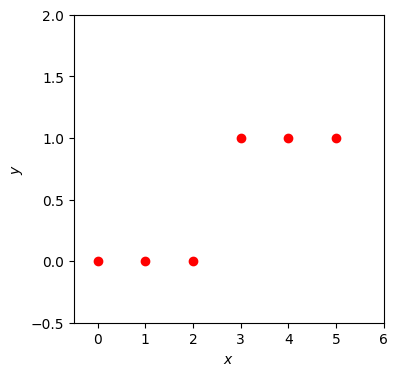

In [76]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])
X_train2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])

fig,ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_train,y_train,'ro')

ax.axis([-0.5, 6, -0.5, 2])
ax.set_ylabel('$y$')
ax.set_xlabel('$x$')
plt.show()

Using Linear Regression

Iteration 0: cost = 0.248502578125, w = 0.00075, b = 0.0
Iteration 100: cost = 0.1362438489767599, w = 0.06776093613318816, b = -0.0021741802801548697
Iteration 200: cost = 0.07623876852001882, w = 0.12151335306184356, b = -0.007943955807623098
Iteration 300: cost = 0.046234863330786836, w = 0.16522411780705903, b = -0.016422731999675824
Iteration 400: cost = 0.03339659942896589, w = 0.20131442890468046, b = -0.026942698530064233
Iteration 500: cost = 0.03032147974369746, w = 0.23156102542425255, b = -0.03901086210355307
Iteration 600: cost = 0.03270331581033984, w = 0.2572671092224632, b = -0.05226271572361478
Iteration 700: cost = 0.038014949032464135, w = 0.27939823936606256, b = -0.06642588205976593
Iteration 800: cost = 0.044767040192799444, w = 0.29867986945079505, b = -0.08129402070780373
Iteration 900: cost = 0.05208534033472112, w = 0.3156651538772025, b = -0.09670860228810543
Example 0: Predicted = 0 , True = 0
Example 1: Predicted = 0 , True = 0
Example 2: Predicted = 1 , Tr

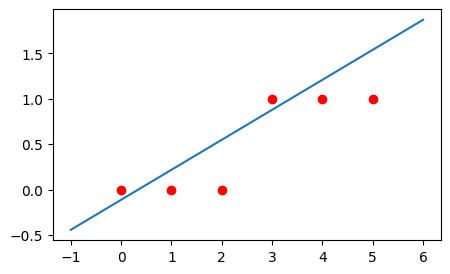

In [75]:
w = 0
b = 0
w, b = gradient_descent(x_train,y_train,w,b,0.001,1000,compute_gradient)

for i in range(x_train.shape[0]):
    y_hat = predict_element(x_train[i],w,b)
    if y_hat >= 0.5:
        y_hat = 1
    else:
        y_hat = 0
    print(f"Example {i}: Predicted = {y_hat} , True = {y_train[i]}")

z = np.arange(-1,7)
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z,predict_element(z,w,b))
ax.plot(x_train,y_train,'ro')
plt.show()

Sigmoid Function

Text(0.5, 0, 'z')

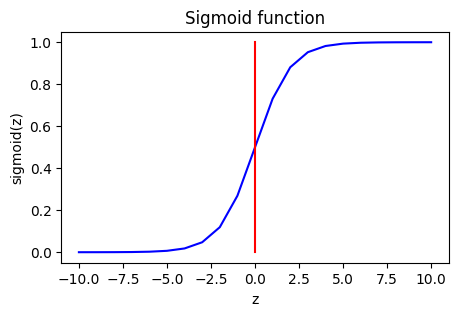

In [108]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """

    g = 1/(1+np.exp(-z))
   
    return g

# Plot sigmoid(z) over a range of values from -10 to 10
z = np.arange(-10,11)

fig,ax = plt.subplots(1,1,figsize=(5,3))
# Plot z vs sigmoid(z)
ax.plot(z, sigmoid(z), c="b")
ax.plot(np.zeros(2),np.arange(0,2),c="r")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')

# 8 - Logistic Loss & Cost

In [94]:
def compute_loss_logistic(x,y,w,b):
    """
    Computes loss for one training example

    Args:
        x (array(1,n)): Data, 1 example with n features
        y (scalar): target value
        w (array(n,)): model parameters
        b (scalar): model parameter
    
    Returns:
        loss (scalar): loss
    """

    f = sigmoid(np.dot(x,w)+b)
    loss = -y*(np.log(f))-(1-y)*(np.log(1-f))
    return loss
        
    

def compute_cost_logistic(X, y, w, b):
    """
    Computes cost

    Args:
      X (array (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = len(y)
    cost = 0
    for i in range(m):
        cost += compute_loss_logistic(X[i],y[i],w,b)
        
    cost = cost / m
    
    return cost

Example

In [95]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_cost_logistic(X_train, y_train, w_tmp, b_tmp))

0.36686678640551745


Gradient Descent for Logistic Regression

In [115]:
def compute_gradient_logistic(X, y, w, b): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    
    cost_w = np.zeros((n,))
    cost_b = 0
    
    for i in range(m):
        f = sigmoid(np.dot(w,X[i])+b)
        loss = f - y[i]
        
        for j in range(n):
          cost_w[j] += loss*X[i,j]
            
        cost_b += loss
    
    dj_dw = cost_w / m
    dj_db = cost_b / m
    
    return dj_db, dj_dw

Example

In [116]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


In [117]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """

    w = w_in
    b = b_in
    
    for i in range(num_iters):
        
        dj_db, dj_dw = compute_gradient_logistic(X,y,w,b)
        
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
    
    return w, b

Example

In [119]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")


updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837


# 9 - Logistic Regression using Scikit-Learn

In [123]:
from sklearn.linear_model import LogisticRegression

X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

lr_model = LogisticRegression()
lr_model.fit(X, y) # Fit the model

y_pred = lr_model.predict(X) # Make Predictions

print("Prediction on training set:", y_pred)

print("Accuracy on training set:", lr_model.score(X, y)) # Calculate accuracy

Prediction on training set: [0 0 0 1 1 1]
Accuracy on training set: 1.0


# 10 - Regularized Cost and Gradient to solve Overfitting

In [141]:
def compute_cost_linear_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost 
    """
    m = X.shape[0]
    n = len(w)
    
    cost = compute_cost_multiple_features(X,y,w,b)
    reg_cost = 0
    
    for i in range(n):
      reg_cost += w[i]**2
    
    reg_cost = reg_cost * (lambda_/(2*m))
    total_cost = cost + reg_cost
    
    return total_cost

Example

In [142]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_linear_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.07917239320214277


In [146]:
def compute_cost_logistic_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost 
    """
    m, n = X.shape
    
    cost = compute_cost_logistic(X,y,w,b)
    reg_cost = 0
    
    for i in range(n):
      reg_cost += w[i]**2
    
    reg_cost = reg_cost * (lambda_/(2*m))
    total_cost = cost + reg_cost
    
    return total_cost
    

Example

In [147]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_logistic_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.6850849138741673


In [156]:
def compute_gradient_linear_reg(X, y, w, b, lambda_): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m = X.shape[0]
    
    dj_db , dj_dw = compute_gradient_multiple_features(X,y,w,b)
    
    dj_dw += (lambda_ / m) * w
    
    return dj_db, dj_dw
    

Example

In [157]:
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_gradient_linear_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.6648774569425726
Regularized dj_dw:
 [0.29653214748822276, 0.4911679625918033, 0.21645877535865857]


In [158]:
def compute_gradient_logistic_reg(X, y, w, b, lambda_): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns
      dj_dw (ndarray Shape (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)            : The gradient of the cost w.r.t. the parameter b. 
    """
    m = X.shape[0]
    
    dj_db , dj_dw = compute_gradient_logistic(X,y,w,b)
    
    dj_dw += (lambda_ / m) * w
    
    return dj_db, dj_dw
    

Example

In [159]:
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_gradient_logistic_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.341798994972791
Regularized dj_dw:
 [0.17380012933994293, 0.32007507881566943, 0.10776313396851499]
